In [53]:
# the usual suspects
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
from pandas import DataFrame, Grouper
%matplotlib inline

In [46]:
# time series plot of TMAX
# the "squeeze=True" argument loads this as a series instead of a dataframe
# the "parse_dates=True" argument converts the 'DATE' to a date which will cause
# pandas to create the index as a date_index, needed for date grouping later
series_tmax = pd.read_csv('data/5YDailyObsDekalbAIrport - 2651287.csv', 
                          usecols=['DATE','TMAX'], 
                          index_col='DATE',
                          parse_dates=True,
                          squeeze=True)
series_tmax.index.dtype
# for my purposes'<M8[ns]' is the same as 'datetime64'

dtype('<M8[ns]')

In [61]:
series_tmax.tail()

DATE
2021-07-07    87.0
2021-07-08    85.0
2021-07-09    88.0
2021-07-10    83.0
2021-07-11    87.0
Name: TMAX, dtype: float64

<AxesSubplot:xlabel='DATE'>

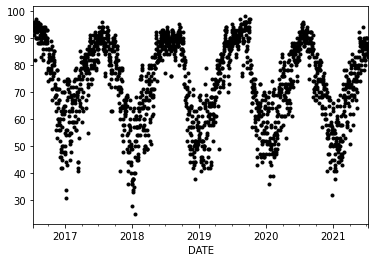

In [113]:
series_tmax.plot(style="k.")
# pyplot.show()

In [104]:
# fill out partial years
idx=pd.date_range('2016-01-01', '2021-12-31')
series_tmax_pad = series_tmax.reindex(idx)
# ignore leap_days so that each annual series will each have the same number of elements
series_tmax_pad = series_tmax_pad[~((series_tmax_pad.index.month==2) & (series_tmax_pad.index.day==29))]
series_tmax_padhead()

2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
Name: TMAX, dtype: float64

<AxesSubplot:>

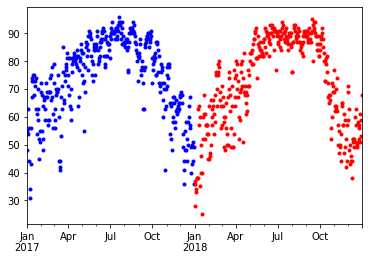

In [123]:
#plot 2018 data
series_tmax_pad[series_tmax_pad.index.year==2017].plot(style="b.")
series_tmax_pad[series_tmax_pad.index.year==2018].plot(style="r.")

In [133]:
# create a dataframe with each column a year's worth of data 
groups = series_tmax_pad.groupby(Grouper(freq='A'))
df_years = DataFrame()
for name, group in groups:
    df_years[name.year] = group.values
df_years  
    
# df_years.head()
#     print(years[name.year])
# df_dailyobs_tmax_annual=df_dailyobs_tmax.groupby(Grouper(freq='A'))
# groups = series.groupby(Grouper(freq='A'))

# this is not working because the groups have differing lengths

,2016,2017,2018,2019,2020,2021
0,NaN,48.0,28.0,64.0,55.0,66.0
1,NaN,55.0,36.0,57.0,47.0,64.0
2,NaN,63.0,37.0,54.0,57.0,53.0
3,NaN,54.0,33.0,64.0,57.0,56.0
4,NaN,56.0,34.0,57.0,51.0,55.0
...,...,...,...,...,...,...
360,70.0,43.0,51.0,64.0,56.0,NaN
361,65.0,44.0,61.0,67.0,57.0,NaN
362,65.0,51.0,59.0,69.0,63.0,NaN
363,50.0,49.0,53.0,68.0,50.0,NaN


<AxesSubplot:>

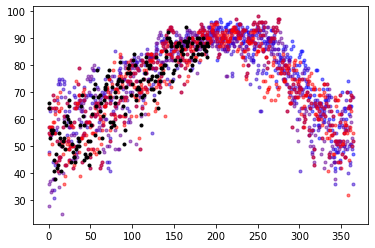

In [155]:
# df_years[2017].plot(style="b.")
df_years[2016].plot(color=(0,0,1,.5), style=".")
df_years[2017].plot(color=(.2,0,.8,.5), style=".")
df_years[2018].plot(color=(.4,0,.6,.5), style=".")
df_years[2019].plot(color=(.6,0,.4,.5), style=".")
df_years[2019].plot(color=(.8,0,.2,.5), style=".")
df_years[2020].plot(color=(1,0,0,.5), style=".")
df_years[2021].plot(color=(0,0,0,), style=".")